# Bayesian Linear Regression:  Portuguese language, T-Distribution:

https://www.statisticshowto.com/probability-and-statistics/t-distribution/


Using Machine Learning to predict student grades

Data:

Eploration student performance data collected from a Portuguese secondary (high) school. The data includes personal and academic characteristics of students along with final class grades. Objective will be to create a model that can predict grades based on the student’s information. This dataset, along with many other useful ones for testing models or trying out data science techniques, is available on the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/student+performance

Data description:
##### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

##### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#Read data
df = pd.read_csv('student/student-por.csv')
df.head(3)    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [2]:
#just an extra check 
# Filter out grades that were 0, just to check if had any missing values
#looks ok, shape with and without is the same
df_check = df[~(df['G3'].isin([0, 1]))]
df_check.shape

(633, 33)

In [3]:
df.shape

(649, 33)

In [4]:
#Ok, need to edit
student = df[~(df['G3'].isin([0, 1]))]
student.shape

(633, 33)

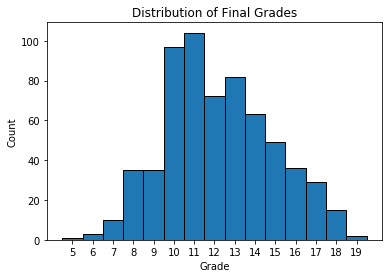

In [5]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
#or a bar plot
plt.bar(student['G3'].value_counts().index, 
        student['G3'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(5, 20)));

### Correlations  for feature selection

Since every variable will not be related to the final grade, so we need to perform feature selection(or dimensionality reduction) to chose only the "relevant" variables. Correlation Coefficient can be used to determine the most useful variables for predicting a grade.

First for numerical values
Than for categorical

In [6]:
# Correlations of numerical values
student.corr()['G3'].sort_values()

failures     -0.384569
absences     -0.204230
Dalc         -0.196891
Walc         -0.178839
traveltime   -0.129654
goout        -0.111228
freetime     -0.105206
health       -0.096461
age          -0.042505
famrel        0.072888
Fedu          0.204392
studytime     0.249855
Medu          0.278690
G1            0.874777
G2            0.942691
G3            1.000000
Name: G3, dtype: float64

In [7]:
#correlation for categorical features
category_df = student.select_dtypes('object')
# One hot encode the variables  0 or 1
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['G3'] = student['G3']
#print categorical features
dummy_df.head(3)
# Correlations in one-hot encoded dataframe
dummy_df.corr()['G3'].sort_values()

higher_no           -0.343742
school_MS           -0.227632
Mjob_at_home        -0.158496
reason_course       -0.138195
internet_no         -0.131408
address_R           -0.128350
sex_M               -0.125755
guardian_other      -0.100802
schoolsup_yes       -0.098185
reason_other        -0.092382
activities_no       -0.078526
paid_yes            -0.067146
nursery_no          -0.056449
romantic_yes        -0.052050
Fjob_at_home        -0.049372
Fjob_services       -0.042497
Mjob_other          -0.035494
Fjob_other          -0.021292
famsize_GT3         -0.012957
guardian_mother     -0.008042
Pstatus_T           -0.001776
famsup_no           -0.001581
famsup_yes           0.001581
Pstatus_A            0.001776
Mjob_services        0.006210
famsize_LE3          0.012957
Fjob_health          0.026320
reason_home          0.046639
romantic_no          0.052050
nursery_yes          0.056449
guardian_father      0.066486
paid_no              0.067146
activities_yes       0.078526
Mjob_healt

### Feature selection

Based on correlation with G3 - Final Grade

In [8]:
student.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [9]:
# Drop the school and the grades from features
    #drop features that are oppposite, higher education yes and no
    #and school support yes and no
student = student.drop(columns=['school', 'G1', 'G2'])
student.head(3)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,4,11
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,2,11
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,6,12


In [10]:
# One-Hot Encoding of Categorical Variables
student = pd.get_dummies(student)
student = student.drop(columns=['higher_no', 'schoolsup_no'])


In [11]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def format_data(student):
    # Targets are final grade of student
    labels = student['G3']

    # Find correlations with the Grade and sort in descending order
    most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:7]
    
    #drop all other variables apart from top 6
    student = student.loc[:, most_correlated.index]
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(student, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

#### select data for modeling
X_train, X_test, y_train, y_test = format_data(student)
X_train.head(10)

,G3,failures,higher_yes,Medu,studytime,Fedu,absences
619,13,0,1,3,2,3,6
323,10,0,1,4,1,3,0
201,16,0,1,2,2,1,0
410,17,0,1,2,2,2,0
426,11,0,1,3,1,3,4
137,11,1,1,2,1,2,12
544,12,0,1,1,1,3,2
270,15,0,1,4,1,4,4
252,13,0,1,4,2,1,0
9,13,0,1,3,2,4,0


In [12]:
#check train and test split
print(X_train.shape)
print(X_test.shape)

(474, 7)
(159, 7)


### Metrics
One of the most overlooked aspects of the machine learning pipeline is establishing a baseline. Yes, it might look impressive if your classification model achieves 99% accuracy, but what if we could get 98% accuracy just by guessing the same class every time? Would we really want to spend our time building a model for that problem? A good baseline allows us to assess whether or not our model (or any model) is applicable to the task.
For regression, a good naive baseline is simply to guess the median value of the target for every observation in the test data. In our problem, the median is 12, so let’s assess the accuracy of a model that naively predicts 12 for every student on the test set. We will use 2 metrics to evaluate predictions:
Mean Absolute Error (MAE): The average of the absolute value of the differences between the predictions and true values.
Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and true values.
The mean absolute error is easily interpretable, as it represents how far off we are on average from the correct value. The root mean squared error penalizes larger errors more heavily and is commonly used in regression tasks. Either metric may be appropriate depending on the situation and we will use both for comparison.


So we predict 12 for every example on the test set:

In [13]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

#### Naive Baseline
For a regression task, a simple naive baseline is to guess the median value on the training set for all testing cases. If our machine learning model cannot better this simple baseline, then perhaps we should try a different approach!


#### Calculate a Baseline Result
Regression: If you are working on a regression problem, you can use a central tendency measure as the result for all predictions, such as the mean or the median.

The accuracy score you use matters. You must select the accuracy score you plan to use before you calculate your baseline. The score must be related and inform the question you set out to answer by working on the problem in the first place.

In [14]:
# Naive baseline is the median
median_pred = X_train['G3'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['G3']

# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 2.1761
Median Baseline RMSE: 2.6777


If our machine learning model cannot beat these metrics, then we either need to get more data, try another approach, or conclude that machine learning is not applicable to our problem!
Our modeling focus is on Bayesian Linear Regression, but it will be helpful to compare our results to those from standard techniques such as Linear Regression, Support Vector Machines, or tree-based methods. We will evaluate several of these methods on our dataset. Luckily, these are all very easy to implement with Python libraries such as Scikit-Learn. 

#### Standard Machine Learning Models
Linear Regression, Elastic Regression, Random Forest, Extra Trees, SVM, Gradient Boosted, Baseline

In [15]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='G3')
    X_test = X_test.drop(columns='G3')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

results = evaluate(X_train, X_test, y_train, y_test)
results


,mae,rmse
Linear Regression,1.8859,2.27395
ElasticNet Regression,2.09282,2.53656
Random Forest,1.84783,2.30829
Extra Trees,1.92499,2.43946
SVM,1.90262,2.30825
Gradient Boosted,1.81272,2.22737
Baseline,2.1761,2.67765


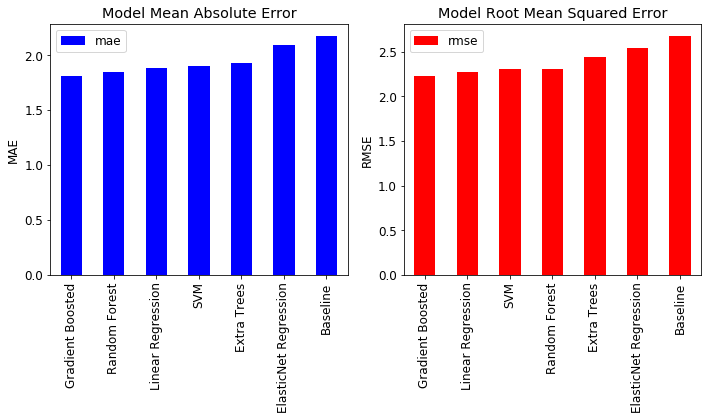

In [16]:
# visual comparison of Models
# Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [17]:
print('Gradient Boosted is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Gradient Boosted', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

Gradient Boosted is 16.70% better than the baseline.


In [18]:
lr = LinearRegression()
lr.fit(X_train.drop(columns='G3'), y_train)

ols_formula = 'Grade = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'Grade = 9.19 + -1.32 * failures + 1.86 * higher_yes + 0.26 * Medu + 0.58 * studytime + 0.03 * Fedu + -0.07 * absences'

# Implementing Bayesian Regression

In [19]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'G3 ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'G3 ~ failures + higher_yes + Medu + studytime + Fedu + absences'

In [20]:
# PyMC3 for Bayesian Inference
import pymc3 as pm

# Set number of draws for sampling
NDRAWS = 2000
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    #linear model and adds a Normal likelihood by default
    family = pm.glm.families.StudentT()
    
    # Making the model only requires specifying the formula and the data
    pm.GLM.from_formula(formula, X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    student_trace = pm.sample(draws=NDRAWS, chains=2, tune = 500)


WARNING (theano.gof.compilelock): Overriding existing lock by dead process '4956' (I am process '5776')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, absences, Fedu, studytime, Medu, higher_yes, failures, Intercept]
Sampling 2 chains, 0 divergences: 100%|█| 5000/5000 [00:24<00:00, 207.35draws/s


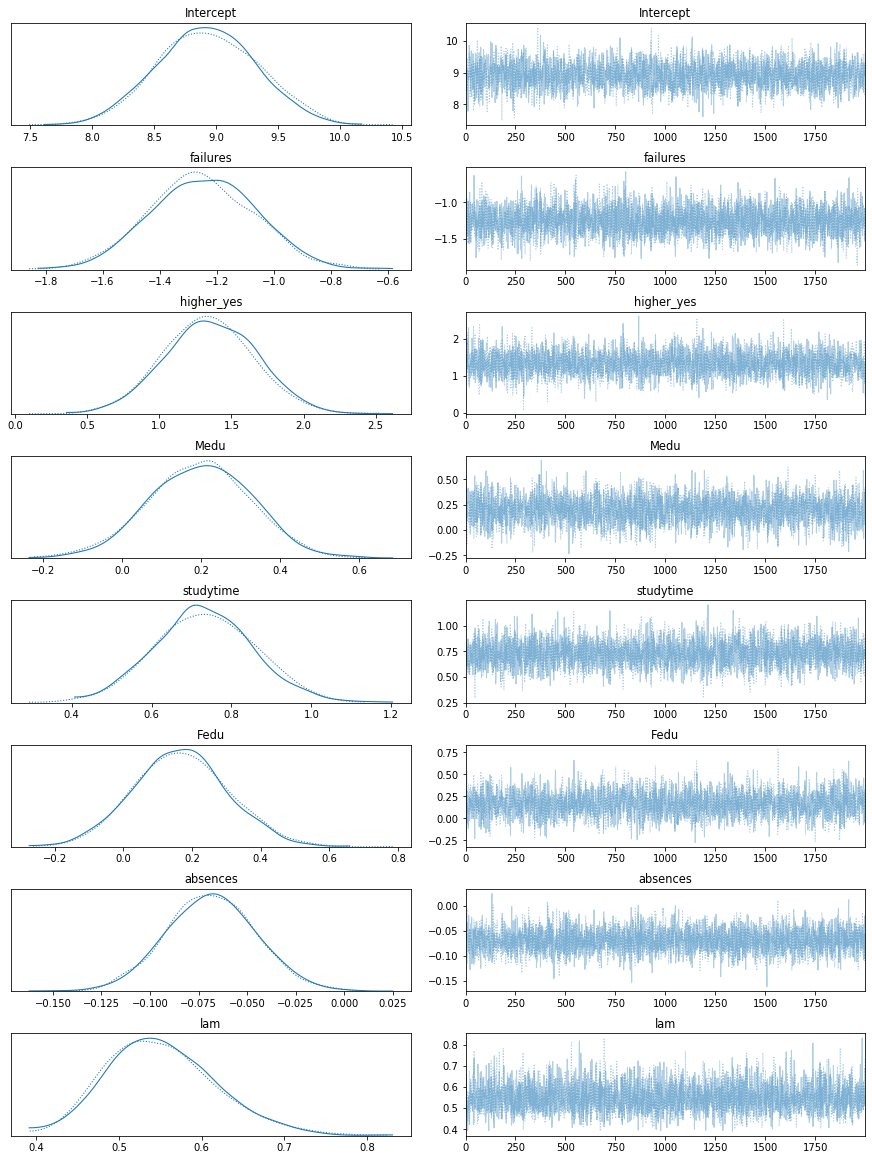

In [21]:
pm.traceplot(student_trace);

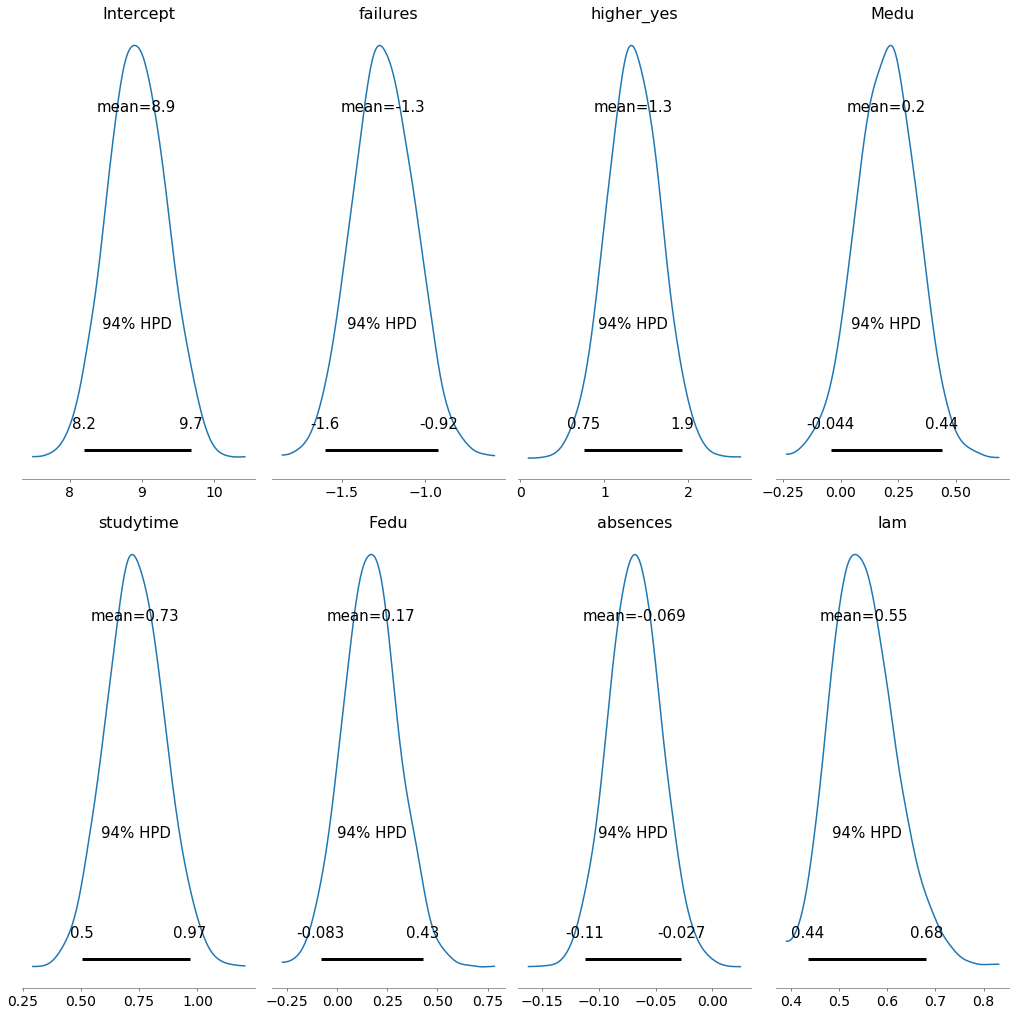

In [22]:
pm.plot_posterior(student_trace, figsize = (14, 14));

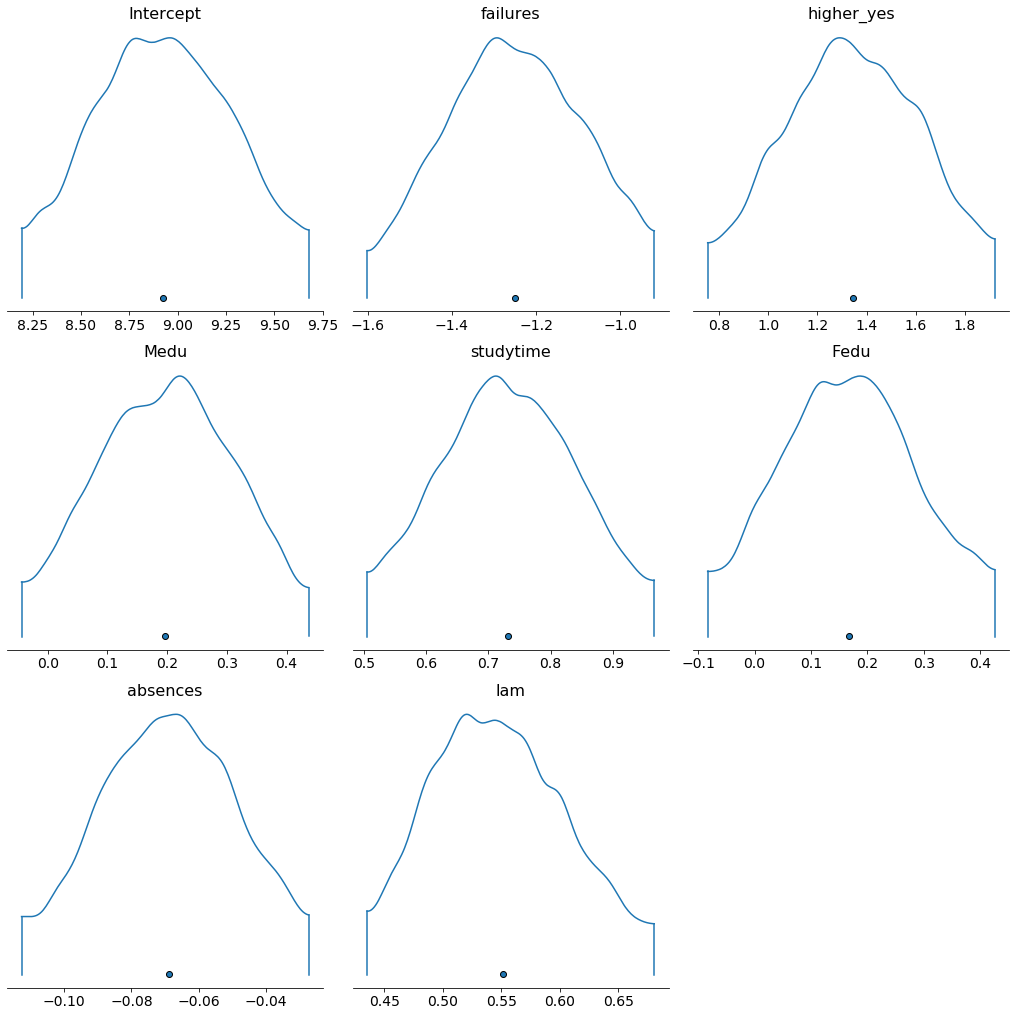

In [23]:
pm.densityplot(student_trace, figsize = (14, 14));

In [24]:
# Print out the mean variable weight from the trace
for variable in student_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(student_trace[variable])))

Variable: Intercept       Mean weight in model: 8.9237
Variable: failures        Mean weight in model: -1.2501
Variable: higher_yes      Mean weight in model: 1.3437
Variable: Medu            Mean weight in model: 0.1962
Variable: studytime       Mean weight in model: 0.7310
Variable: Fedu            Mean weight in model: 0.1671
Variable: absences        Mean weight in model: -0.0688
Variable: lam_log__       Mean weight in model: -0.6029
Variable: lam             Mean weight in model: 0.5511


In [25]:
model_formula = 'y ~ '
for variable in student_trace.varnames:
    model_formula += '(%0.4f * %s) + ' % (np.mean(student_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-2])

'y ~ (8.9237 * Intercept) + (-1.2501 * failures) + (1.3437 * higher_yes) + (0.1962 * Medu) + (0.7310 * studytime) + (0.1671 * Fedu) + (-0.0688 * absences) + (-0.6029 * lam_log__) + (0.5511 * lam)'

In [26]:
pm.summary(student_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,8.924,0.400,8.193,9.677,0.008,0.005,2795.0,2787.0,2793.0,2675.0,1.0
failures,-1.250,0.184,-1.602,-0.919,0.003,0.002,3608.0,3568.0,3596.0,2989.0,1.0
higher_yes,1.344,0.313,0.755,1.921,0.006,0.004,2968.0,2961.0,2963.0,2708.0,1.0
Medu,0.196,0.129,-0.044,0.437,0.002,0.002,2693.0,2693.0,2711.0,2657.0,1.0
studytime,0.731,0.124,0.505,0.966,0.002,0.002,3262.0,3231.0,3263.0,2831.0,1.0
Fedu,0.167,0.137,-0.083,0.426,0.003,0.002,2835.0,2504.0,2837.0,2776.0,1.0
absences,-0.069,0.023,-0.113,-0.027,0.000,0.000,3844.0,3679.0,3868.0,3112.0,1.0
lam,0.551,0.066,0.435,0.681,0.001,0.001,3755.0,3588.0,3888.0,2917.0,1.0


In [27]:
print(results)

                           mae     rmse
Linear Regression       1.8859  2.27395
ElasticNet Regression  2.09282  2.53656
Random Forest          1.84783  2.30829
Extra Trees            1.92499  2.43946
SVM                    1.90262  2.30825
Gradient Boosted       1.81272  2.22737
Baseline                2.1761  2.67765


### Evaluate Bayesian Model Using Mean of Model Parameters

In [28]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

Model  MAE: 1.8867
Model RMSE: 2.3016


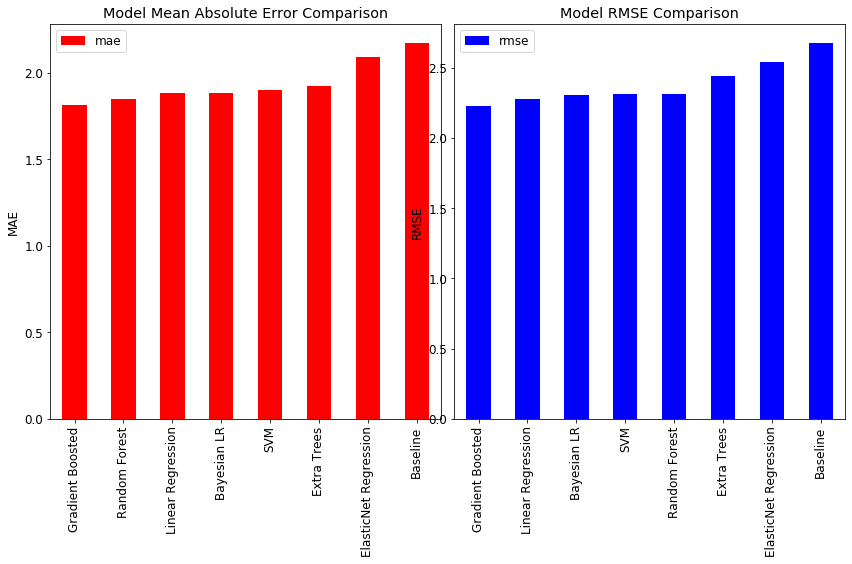

In [29]:
all_model_results = evaluate_trace(student_trace, X_train, X_test, y_train, y_test, results)


In [30]:
all_model_results

,mae,rmse
Linear Regression,1.8859,2.27395
ElasticNet Regression,2.09282,2.53656
Random Forest,1.84783,2.30829
Extra Trees,1.92499,2.43946
SVM,1.90262,2.30825
Gradient Boosted,1.81272,2.22737
Baseline,2.1761,2.67765
Bayesian LR,1.88669,2.30157


#### Interpret Variable Effects
In order to see the effect of a single variable on the grade, we can change the value of this variable while holding the others constant and look at how the estimated grades change. To do this, we use the plot_posterior_predictive function and assume that all variables except for the one of interest (the query variable) are at the median value. We generate a range of values for the query variable and the function estimates the grade across this range by drawing model parameters from the posterior distribution. Here’s the code:

In [31]:
# Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
#    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
#    figsize(6, 6)
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('Grade', size = 16)
    plt.title("Posterior of Grade vs %s" % query_var, size = 18)
    plt.show()

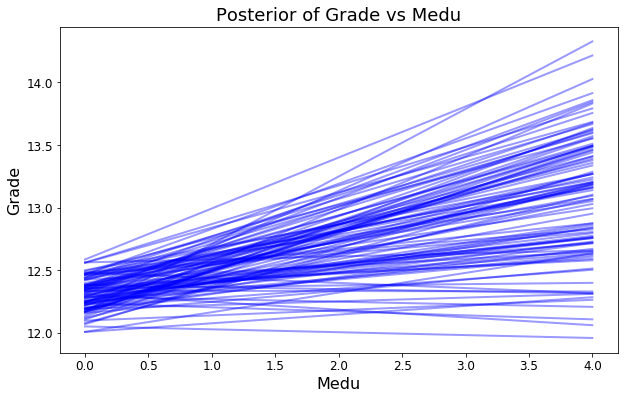

In [32]:
model_effect('Medu', student_trace, X_train.drop(columns='G3'))

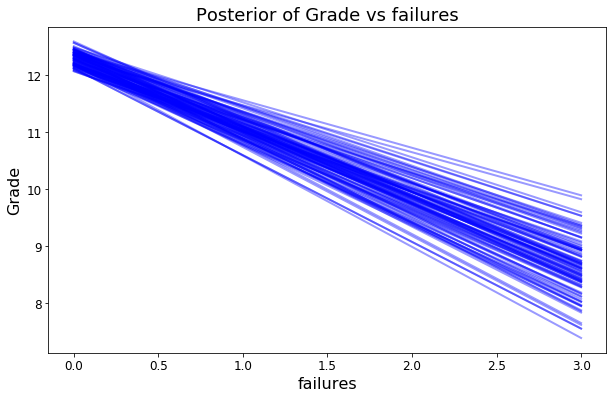

In [33]:
#failures
model_effect('failures', student_trace, X_train.drop(columns='G3'))

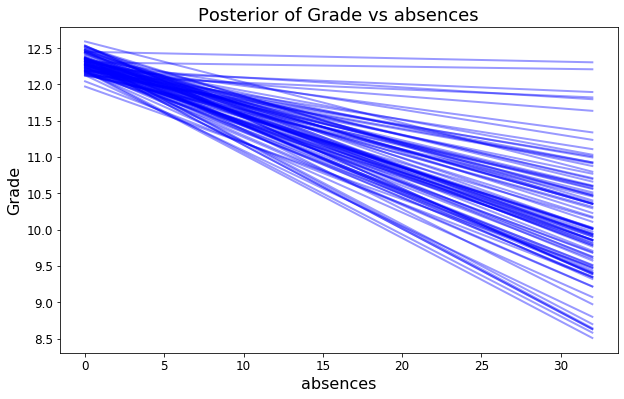

In [34]:
#abcences
model_effect('absences', student_trace, X_train.drop(columns='G3'))